In [464]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import f_oneway

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns

import re

In [465]:
df=pd.read_csv('/mnt/All/Downloads/Car_details_v3.csv')

In [466]:
display(df.head())
df.shape

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


(8128, 13)

In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [468]:
df=df.drop('name',axis=1)

In [469]:
df=df.drop(4933) #некоректное значение max_power

In [470]:
df.loc[:,'mileage']= df.loc[df['mileage'].notna(),'mileage'].apply(lambda x: re.search(r"[\d\.]+",x).group())
df.loc[:,'mileage']= df.loc[df['mileage'].notna(),'mileage'].astype("float")

df.loc[:,'engine']= \
    df.loc[df['engine'].notna(),'engine'].apply(lambda x: re.search(r"[\d]+",x).group())
df.loc[:,'engine']= df.loc[df['engine'].notna(),'engine'].astype("int")

df.loc[:,'max_power']= \
    df.loc[df['max_power'].notna(),'max_power'].apply(lambda x: re.search(r"[\d\.]+",x).group())
df.loc[:,'max_power']= df.loc[df['max_power'].notna(),'max_power'].astype("float")

df.loc[:,'torque']= \
    df.loc[df['torque'].notna(),'torque'].apply(lambda x: re.search(r"[\d\.]+",x).group())
df.loc[:,'torque']= df.loc[df['torque'].notna(),'torque'].astype("float")

/tmp/ipykernel_90319/860976924.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'mileage']= df.loc[df['mileage'].notna(),'mileage'].astype("float")
/tmp/ipykernel_90319/860976924.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'engine']= df.loc[df['engine'].notna(),'engine'].astype("int")
/tmp/ipykernel_90319/860976924.py:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.co

In [471]:
df=df.dropna()

In [472]:
txt=df.columns[df.dtypes==object]
for x in df[txt]:
    print(x,len(df[x].unique()))

fuel 4
seller_type 3
transmission 2
owner 5


<Figure size 640x480 with 0 Axes>

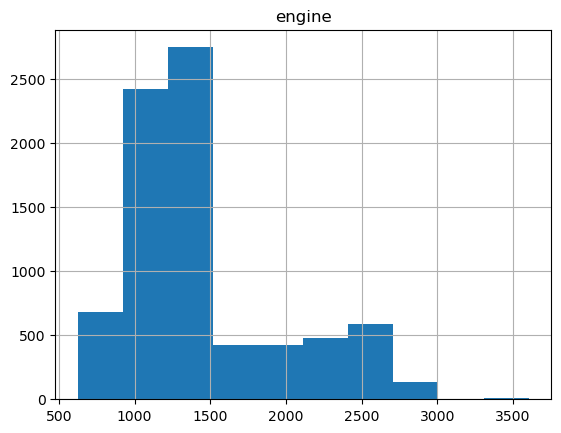

<Figure size 640x480 with 0 Axes>

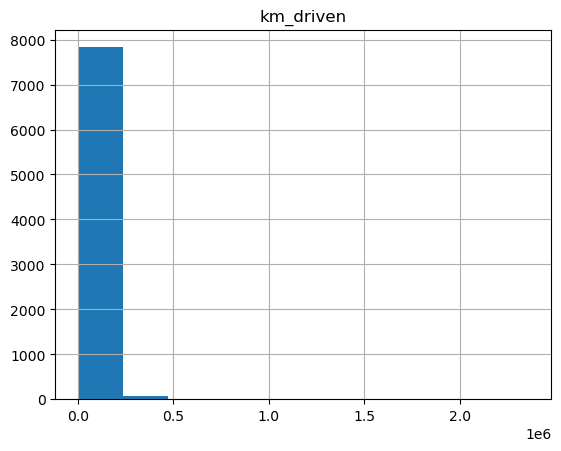

<Figure size 640x480 with 0 Axes>

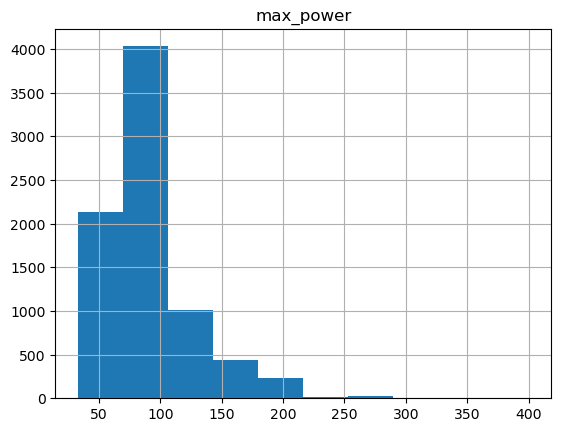

<Figure size 640x480 with 0 Axes>

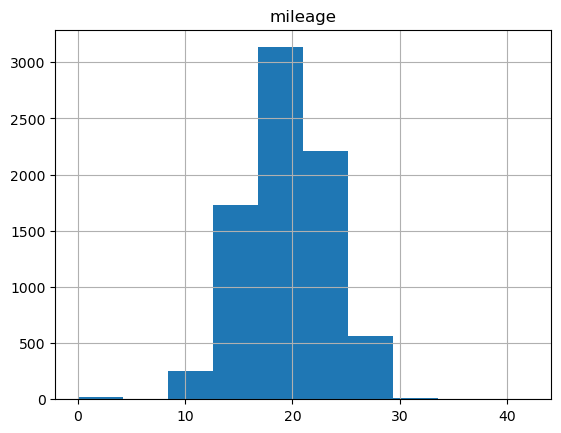

<Figure size 640x480 with 0 Axes>

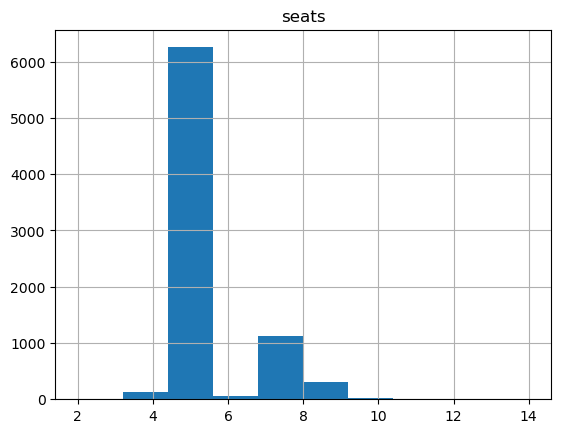

<Figure size 640x480 with 0 Axes>

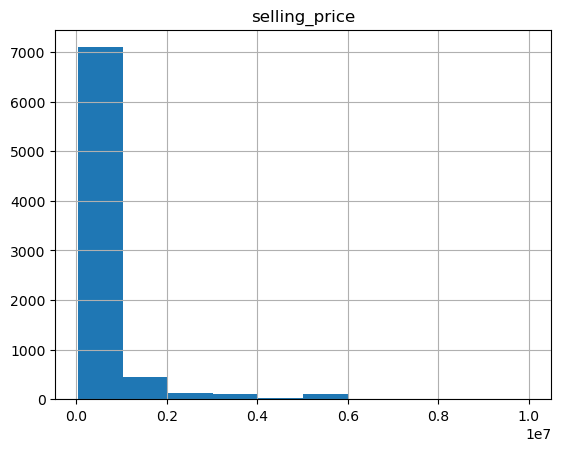

<Figure size 640x480 with 0 Axes>

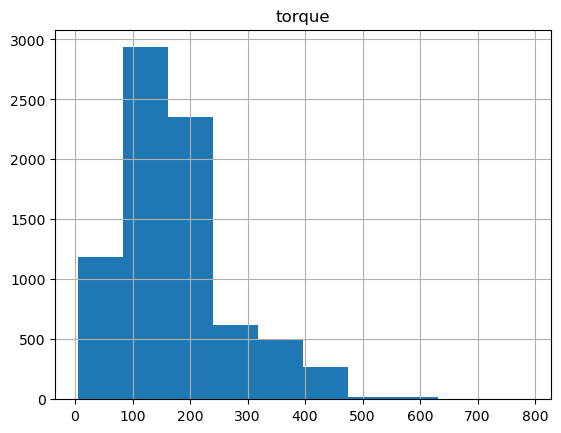

<Figure size 640x480 with 0 Axes>

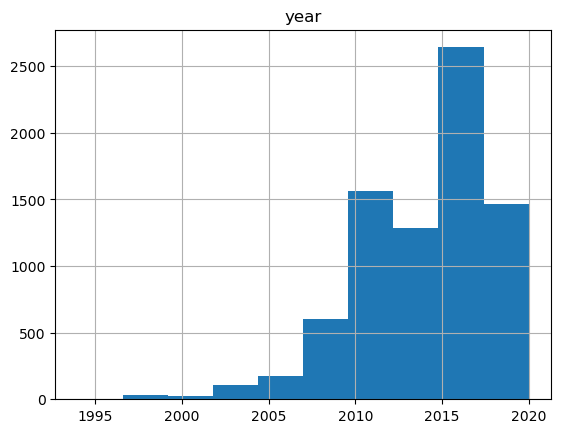

In [473]:
integ=np.setdiff1d(df.columns,txt)
for column in integ:
    plt.figure()
    df.hist(column=[column])

In [474]:
z=np.abs(stats.zscore(df[integ]))
df[integ]=df[integ][(z<3).all(axis=1)]
df=df.dropna()
df=df.reset_index(drop=True)

<Figure size 640x480 with 0 Axes>

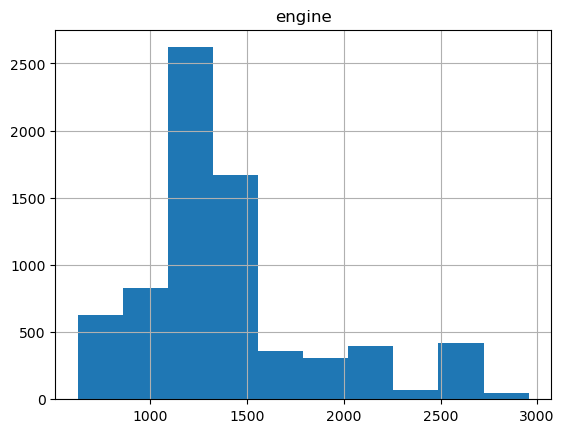

<Figure size 640x480 with 0 Axes>

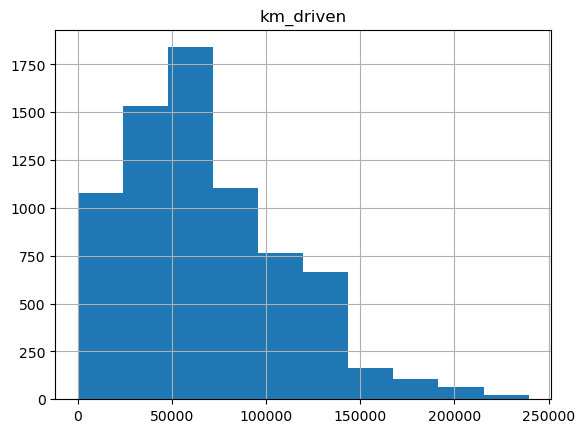

<Figure size 640x480 with 0 Axes>

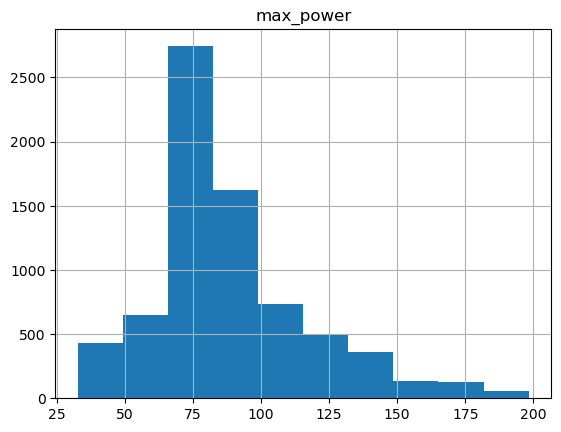

<Figure size 640x480 with 0 Axes>

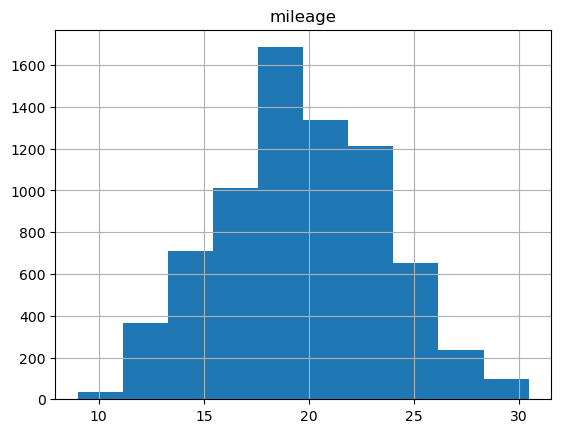

<Figure size 640x480 with 0 Axes>

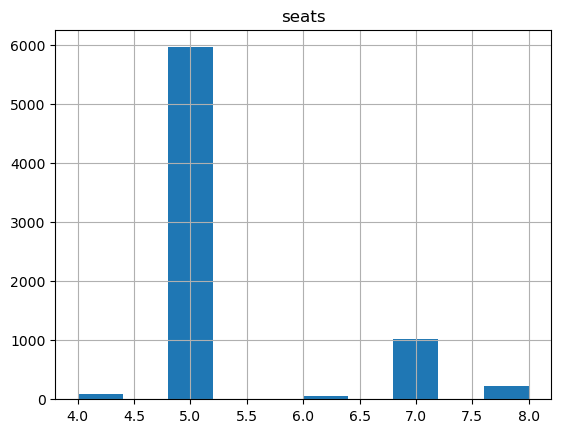

<Figure size 640x480 with 0 Axes>

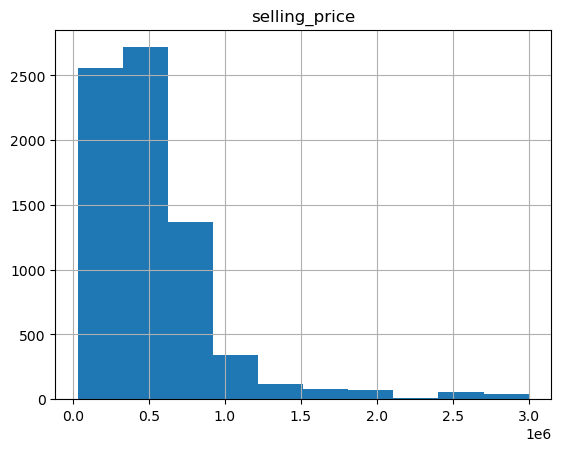

<Figure size 640x480 with 0 Axes>

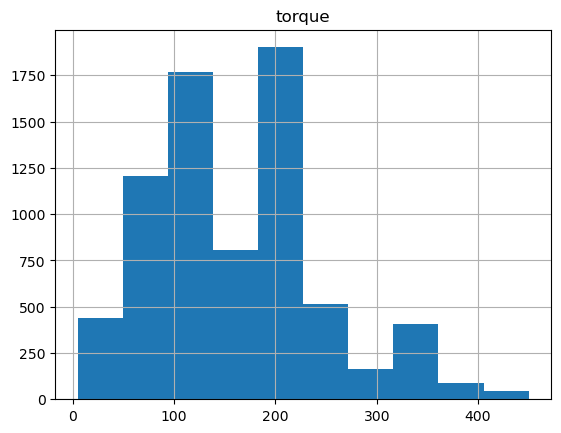

<Figure size 640x480 with 0 Axes>

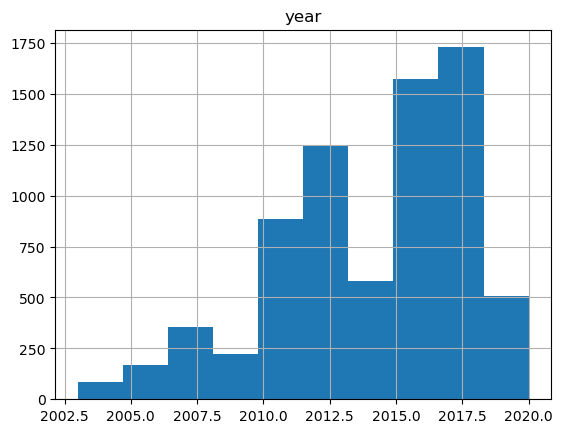

In [475]:
for column in integ:
    plt.figure()
    df.hist(column=[column])

In [476]:
onehot=OneHotEncoder(drop='first',sparse_output=False)
transformed=pd.DataFrame(onehot.fit_transform(df[txt]),columns=onehot.get_feature_names_out())
transformed

,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7338,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7339,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7340,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7341,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [477]:
df=pd.concat([df[integ],transformed],axis=1,join="inner")
df

,engine,km_driven,max_power,mileage,seats,selling_price,torque,year,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,1248.0,145500.0,74.00,23.40,5.0,450000.0,190.0,2014.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1498.0,120000.0,103.52,21.14,5.0,370000.0,250.0,2014.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1497.0,140000.0,78.00,17.70,5.0,158000.0,12.7,2006.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1396.0,127000.0,90.00,23.00,5.0,225000.0,22.4,2010.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1298.0,120000.0,88.20,16.10,5.0,130000.0,11.5,2007.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7338,1197.0,110000.0,82.85,18.50,5.0,320000.0,113.7,2013.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7339,1493.0,119000.0,110.00,16.80,5.0,135000.0,24.0,2007.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7340,1248.0,120000.0,73.90,19.30,5.0,382000.0,190.0,2009.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7341,1396.0,25000.0,70.00,23.57,5.0,290000.0,140.0,2013.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [478]:
y=df['selling_price']
x=df.drop('selling_price',axis=1)

In [479]:
vif=pd.DataFrame()
vif['feature']=x.columns
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,feature,vif
0,engine,54.567030
1,km_driven,5.348403
2,max_power,42.145705
3,mileage,75.913873
4,seats,83.980655
5,torque,19.523428
6,year,474.774500
7,fuel_Diesel,90.099443
8,fuel_LPG,1.778760
9,fuel_Petrol,77.825215


In [480]:
try:
    while(vif.max()[1]>5 ):
        m=vif.max()[1]
        m=vif[vif['vif']==m]['feature']
        x=x.drop(m,axis=1)
        vif=pd.DataFrame()
        vif['feature']=x.columns
        vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
except:
    print(vif)

In [481]:
print(vif.max())
vif

feature      torque
vif        3.386503
dtype: object


,feature,vif
0,km_driven,3.386503
1,torque,2.525444
2,fuel_LPG,1.008674
3,fuel_Petrol,1.312526
4,seller_type_Trustmark Dealer,1.064517
5,owner_Fourth & Above Owner,1.054678
6,owner_Second Owner,1.533537
7,owner_Test Drive Car,1.000845
8,owner_Third Owner,1.179774


In [482]:
x

,km_driven,torque,fuel_LPG,fuel_Petrol,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,145500.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,120000.0,250.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,140000.0,12.7,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,127000.0,22.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,120000.0,11.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
7338,110000.0,113.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7339,119000.0,24.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7340,120000.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7341,25000.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [483]:
X1=x.copy()
X1['intercept']=np.ones([X1.shape[0],1])
results = sm.OLS(y, X1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     941.5
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:47:28   Log-Likelihood:            -1.0251e+05
No. Observations:                7343   AIC:                         2.050e+05
Df Residuals:                    7333   BIC:                         2.051e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
km_driven                       -2.4175      0.091    -26.664      0.000      -2.595      -2.240
torque                        3365.1157     52.286     64.360      0.000    3262.621    3467.611
fuel_LPG                      8.143e+04   4.88e+04      1.670      0.095   -1.42e+04    1.77e+05
fuel_Petrol                   6.023e+04   9461.878      6.365      0.000    4.17e+04    7.88e+04
seller_type_Trustmark Dealer   2.45e+05   1.88e+04     13.033      0.000    2.08e+05    2.82e+05
owner_Fourth & Above Owner   -1.481e+05   2.46e+04     -6.027      0.000   -1.96e+05   -9.99e+04
owner_Second Owner           -9.809e+04   8000.906    -12.259      0.000   -1.14e+05   -8.24e+04
owner_Test Drive Car          8.159e+05   1.98e+05      4.121      0.000    4.28e+05     1.2e+06
owner_Third Owner            -1.145e+05    1.4e+04     -8.155      0.000   -1.42e+05    -8.7e+04
intercept                     1.521e+05   1.49e+04     10.196      0.000    1.23e+05    1.81e+05
==============================================================================
Omnibus:                     3075.979   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20398.112
Skew:                           1.878   Prob(JB):                         0.00
Kurtosis:                      10.250   Cond. No.                     4.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [484]:
display([results.pvalues[i] for i in x])
for i in x:
    if results.pvalues[i]>0.05:
        x=x.drop(i,axis=1)

[1.387994346967137e-149,
 0.0,
 0.09504335602647587,
 2.0642366693280752e-10,
 2.107155422815856e-38,
 1.75350933038415e-09,
 3.227781380740235e-34,
 3.8187831300891275e-05,
 4.0658392357172407e-16]

In [485]:
pval=[results.pvalues[i] for i in x]
display(max(pval))
display(len(pval)) 

display(pval)

3.8187831300891275e-05

8

[1.387994346967137e-149,
 0.0,
 2.0642366693280752e-10,
 2.107155422815856e-38,
 1.75350933038415e-09,
 3.227781380740235e-34,
 3.8187831300891275e-05,
 4.0658392357172407e-16]

In [486]:
sys=LinearRegression()
sys.fit(x,y)

LinearRegression()

In [487]:
sys.score(x,y)

0.5359040082475162

In [488]:
sys.coef_

array([-2.42223697e+00,  3.35213069e+03,  5.79820981e+04,  2.45156687e+05,
       -1.48074308e+05, -9.80666348e+04,  8.16081193e+05, -1.14142183e+05])

In [489]:
pred=pd.Series(sys.predict(x))

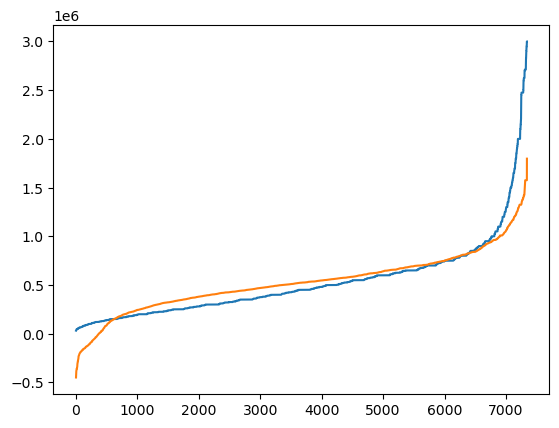

In [490]:
plt.figure()
plt.plot(range(len(y)),y.sort_values())
plt.plot(range(len(y)),pred.sort_values())

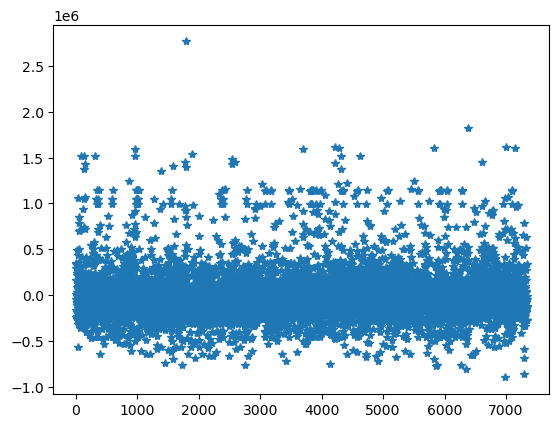

In [491]:
plt.plot(y-pred,'*')